<a href="https://colab.research.google.com/github/afonsoalrocha/greedy-search/blob/main/greedy_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Greedy Search - Bucharest cities
This notebook's goal is to train the implementatio and explanation of the logic behind a greedy search, one of the techniques used to find the best course to take between 2 points.

Greedy search is an algorithm that finds the optimal choice in every small step of the way to get to a certain point, this algorithm is called greedy because it doesn't consider the big picture, analyzing only the next stop of the entire way.

In this notebook we will implement a classic example of this algorithm, we will design a graph with cities of Romania and make the greedy search algorithm decide for what is the best choice to get to the city we want.

## Creating the Graph
In order to implement the Greedy Search first we have to design the graph with the required nodes and each relation between the nodes, in this case each node represents a city.

Here follows a representation of the graph:

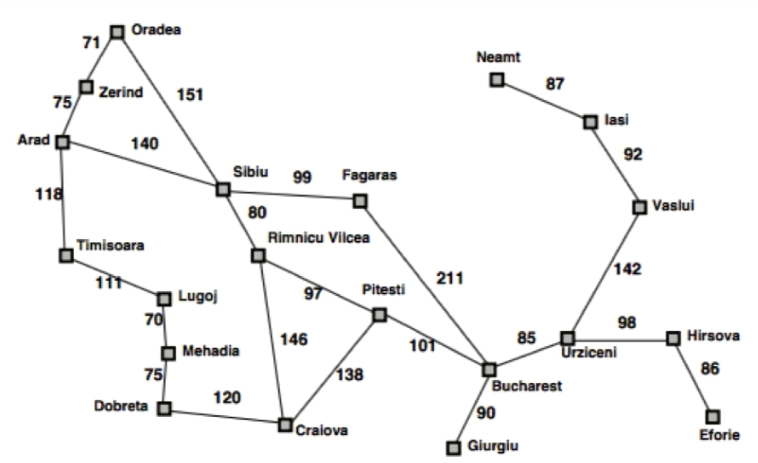



In [1]:
class Node:
  def __init__(self, node_name, distance_goal):
    self.node_name = node_name
    self.visited = False
    self.distance_goal = distance_goal
    self.links = []

  def add_link(self, link ):
    self.links.append(link)

  def show_link(self):
    for i in self.link:
      print(i)

In [2]:
class Link:
    def __init__(self, node, interval):
        self.node = node
        self.interval = interval

In [3]:
class Graph:
  arad = Node('Arad', 366)
  zerind = Node('Zerind', 374)
  oradea = Node('Oradea', 380)
  sibiu = Node('Sibiu', 253)
  timisoara = Node('Timisoara', 329)
  lugoj = Node('Lugoj', 244)
  mehadia = Node('Mehadia', 241)
  dobreta = Node('Dobreta', 242)
  craiova = Node('Craiova', 160)
  rimnicu = Node('Rimnicu', 193)
  fagaras = Node('Fagaras', 178)
  pitesti = Node('Pitesti', 98)
  bucharest = Node('Bucharest', 0)
  giurgiu = Node('Giurgiu', 77)

  arad.add_link(Link(zerind, 75))
  arad.add_link(Link(sibiu, 140))
  arad.add_link(Link(timisoara, 118))

  zerind.add_link(Link(arad, 75))
  zerind.add_link(Link(oradea, 71))

  oradea.add_link(Link(zerind, 71))
  oradea.add_link(Link(sibiu, 151))

  sibiu.add_link(Link(oradea, 151))
  sibiu.add_link(Link(arad, 140))
  sibiu.add_link(Link(fagaras, 99))
  sibiu.add_link(Link(rimnicu, 80))

  timisoara.add_link(Link(arad, 118))
  timisoara.add_link(Link(lugoj, 111))

  lugoj.add_link(Link(timisoara, 111))
  lugoj.add_link(Link(mehadia, 70))

  mehadia.add_link(Link(lugoj, 70))
  mehadia.add_link(Link(dobreta, 75))

  dobreta.add_link(Link(mehadia, 75))
  dobreta.add_link(Link(craiova, 120))

  craiova.add_link(Link(dobreta, 120))
  craiova.add_link(Link(pitesti, 138))
  craiova.add_link(Link(rimnicu, 146))

  rimnicu.add_link(Link(craiova, 146))
  rimnicu.add_link(Link(sibiu, 80))
  rimnicu.add_link(Link(pitesti, 97))

  fagaras.add_link(Link(sibiu, 99))
  fagaras.add_link(Link(bucharest, 211))

  pitesti.add_link(Link(rimnicu, 97))
  pitesti.add_link(Link(craiova, 138))
  pitesti.add_link(Link(bucharest, 101))

  bucharest.add_link(Link(fagaras, 211))
  bucharest.add_link(Link(pitesti, 101))
  bucharest.add_link(Link(giurgiu, 90))

In [4]:
graph = Graph()

## Creating the Sorted Vector

after creating the graph with the nodes and its links we need to sort them by distance of the goal and one good way to do this is creating a algorythm that:
1 - Go through the values until finding the first bigger distance than the one you want to add and keep this number
2 - Starting from the last position of the array, moves each object 1 step forward and stops when finding the position keeped in the step 1.
3 Now you can add the distance at that position founded in the step 1.

_**New value = 3**_

 step |  | | | | |
 --- | --- | --- | --- | --- | --- |
 fist | 1 | 2 | **5** | 7 
 second | 1 | 2 | **5** | 5 | 7
 third | 1 | 2 | **3** | 5 | 7




In [5]:
import numpy as np
class SortedVector:
  
  def __init__(self, size):
    self.size = size
    self.last_position = -1
    self.values = np.empty(self.size, dtype=object)

  def insert(self, node):
    if self.last_position == self.size - 1:
      print("You've reached maximum capacity")
      return
    position = 0
    for i in range(self.last_position + 1): # Go through all the values
      position = i
      if self.values[i].distance_goal > node.distance_goal: # Get the right position
        break
      if i == self.last_position: # Increment 1 if i is in the last position before insertion
        position = i + 1
    x = self.last_position
    while x >= position:
      self.values[x + 1] = self.values[x] # Move the nodes 1 step ahead to fit the new one
      x -= 1
    self.values[position] = node # Insert the new node :)
    self.last_position += 1

  def show(self):
    if self.last_position == -1:
      print('There is no vector here :(')
    else:
      for i in range(self.last_position + 1):
        print(i, ' - ', self.values[i].node_name, ' - ', self.values[i].distance_goal)  

## Finally! The Greedy Search

Now we have all we need to search for Bucharest with all the greediness we have.

At this class we will define a goal and a variable that will tell us if we succeed.

We will create a method that will start with the current city and will only stop at Bucharest.

remembering that at the greedy search we can't visit a city twice, so we will have to check that as well



In [6]:
class Greedy:
  def __init__(self, goal):
    self.goal = goal
    self.success = False

  def search(self, current_node):
    print('-------')
    print('Current City: {}'.format(current_node.node_name))
    current_node.visited = True

    if current_node == self.goal:
      self.success = True # That way, this method will continue to run until it finds the goal that is Bucharest
    else:
      sorted_vector = SortedVector(len(current_node.links)) # create the sorted vector according the amount of links
      for link in current_node.links:  # When we implemented the map we added these nodes into a list.
        if link.node.visited == False: 
          link.node.visited == True
          sorted_vector.insert(link.node) # The zero position in this will always be the next node
      sorted_vector.show()

      if sorted_vector.values[0] != None:
        self.search(sorted_vector.values[0]) # Here we go to the next city! at least until we find Bucharest

In [7]:
greedy_search = Greedy(graph.bucharest)
greedy_search.search(graph.arad)

-------
Current City: Arad
0  -  Sibiu  -  253
1  -  Timisoara  -  329
2  -  Zerind  -  374
-------
Current City: Sibiu
0  -  Fagaras  -  178
1  -  Rimnicu  -  193
2  -  Oradea  -  380
-------
Current City: Fagaras
0  -  Bucharest  -  0
-------
Current City: Bucharest
